# Data collection

1. [Tiingo](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-tiingo) was used for the same
  1. sign-up, visit <API> section in the dashboard on left, click to *take me to Documentation*

  2. in the authentication section of the resultant page will be present your api key associated to your account

2. 


In [1]:
import pandas_datareader as pdr

1. 'AAPL' corresponds to apple-stocks timeseries data

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

key = os.getenv("API_KEY")
df = pdr.get_data_tiingo('AAPL', api_key=key)
print(type(df))
df.to_csv("AAPL.csv")

<class 'pandas.core.frame.DataFrame'>


In [3]:
import pandas as pd
from IPython.display import display

df = pd.read_csv("/content/AAPL.csv")
display(df.head(10))
display(df.tail(10))

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-11-03 00:00:00+00:00,122.570,123.49,120.700,120.79,45518976,28.313084,28.525599,27.881122,27.901912,182075904,0.00,1.0
1,AAPL,2015-11-04 00:00:00+00:00,122.000,123.82,121.620,123.13,44886050,28.181416,28.601828,28.093638,28.442441,179544200,0.00,1.0
2,AAPL,2015-11-05 00:00:00+00:00,120.920,122.69,120.180,121.85,39552680,28.052059,28.462679,27.880387,28.267808,158210720,0.52,1.0
3,AAPL,2015-11-06 00:00:00+00:00,121.060,121.81,120.620,121.11,33042283,28.084537,28.258529,27.982462,28.096137,132169132,0.00,1.0
4,AAPL,2015-11-09 00:00:00+00:00,120.570,121.81,120.050,120.96,33871405,27.970863,28.258529,27.850229,28.061338,135485620,0.00,1.0
5,AAPL,2015-11-10 00:00:00+00:00,116.770,118.07,116.061,116.90,59127931,27.089306,27.390891,26.924826,27.119465,236511724,0.00,1.0
6,AAPL,2015-11-11 00:00:00+00:00,116.110,117.42,115.210,116.37,45217971,26.936194,27.240099,26.727404,26.996511,180871884,0.00,1.0
7,AAPL,2015-11-12 00:00:00+00:00,115.720,116.82,115.650,116.26,32525579,26.845718,27.100906,26.829479,26.970992,130102316,0.00,1.0
8,AAPL,2015-11-13 00:00:00+00:00,112.340,115.57,112.270,115.20,45812403,26.061597,26.810920,26.045358,26.725084,183249612,0.00,1.0
9,AAPL,2015-11-16 00:00:00+00:00,114.175,114.24,111.000,111.38,38106701,26.487296,26.502375,25.750732,25.838888,152426804,0.00,1.0


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1248,AAPL,2020-10-19 00:00:00+00:00,115.98,120.419,115.6600,119.96,120639337,115.98,120.419,115.6600,119.96,120639337,0.0,1.0
1249,AAPL,2020-10-20 00:00:00+00:00,117.51,118.980,115.6300,116.20,124423728,117.51,118.980,115.6300,116.20,124423728,0.0,1.0
1250,AAPL,2020-10-21 00:00:00+00:00,116.87,118.705,116.4500,116.67,89945980,116.87,118.705,116.4500,116.67,89945980,0.0,1.0
1251,AAPL,2020-10-22 00:00:00+00:00,115.75,118.040,114.5900,117.45,101987954,115.75,118.040,114.5900,117.45,101987954,0.0,1.0
1252,AAPL,2020-10-23 00:00:00+00:00,115.04,116.550,114.2800,116.39,82572645,115.04,116.550,114.2800,116.39,82572645,0.0,1.0
1253,AAPL,2020-10-26 00:00:00+00:00,115.05,116.550,112.8800,114.01,111850657,115.05,116.550,112.8800,114.01,111850657,0.0,1.0
1254,AAPL,2020-10-27 00:00:00+00:00,116.60,117.280,114.5399,115.49,92276772,116.60,117.280,114.5399,115.49,92276772,0.0,1.0
1255,AAPL,2020-10-28 00:00:00+00:00,111.20,115.430,111.1000,115.05,143937823,111.20,115.430,111.1000,115.05,143937823,0.0,1.0
1256,AAPL,2020-10-29 00:00:00+00:00,115.32,116.930,112.2000,112.37,146129173,115.32,116.930,112.2000,112.37,146129173,0.0,1.0
1257,AAPL,2020-10-30 00:00:00+00:00,108.86,111.990,107.7200,111.06,190573476,108.86,111.990,107.7200,111.06,190573476,0.0,1.0


In [5]:
from datetime import datetime, timedelta
import calendar

d = list(df['date'])[-1]


# take the last known value of stock, and extract its date
d = d.split(" ")[0]
print(type(d), "\n\n", "Last available date =",d, "\n\n")

# convert the date in string format to datetime object
dd = datetime.strptime(d, "%Y-%m-%d")
print(type(dd), "\nLast available date =", dd, "\n\n")

# contain all the dates for which the model has to predict the stock value
futureDates = []
t, counter = 1, 0
while counter < 30:
  td = dd + timedelta(days=t)
  wd = calendar.day_name[td.weekday()]
  if wd != 'Sunday' and wd != 'Saturday':
    futureDates.append(dd + timedelta(days=t))
    counter += 1
  t += 1

print("Total values to be predicted are:", t, "\n\n\n")

<class 'str'> 

 Last available date = 2020-10-30 


<class 'datetime.datetime'> 
Last available date = 2020-10-30 00:00:00 


Total values to be predicted are: 43 





using the closing price, i.e. price at the end of the day for the share of Apple.

In [6]:
df2 = df['close'].reset_index(drop=True)
df2.head(10)

0    122.570
1    122.000
2    120.920
3    121.060
4    120.570
5    116.770
6    116.110
7    115.720
8    112.340
9    114.175
Name: close, dtype: float64

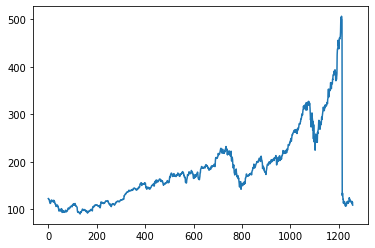

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df2)
plt.show()

since LSTMs are sensitive to the scale of the data, and ANNs usually expect normalized and scaled data, we have to scale the stock prices using `MinMax` scaler

In [8]:
import numpy as np

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# initially the shape is (n,), i.e. a list
# reshape to (n,1), i.e. a list of lists, where each element-list is a 
# mono-membered list
df1 = scaler.fit_transform(np.array(df2).reshape(-1, 1))

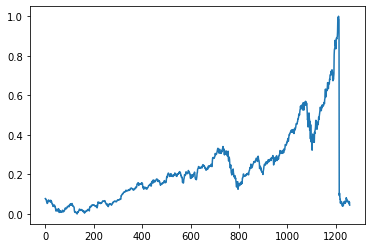

In [9]:
plt.plot(df1)

# Preprocess the data - Train-test determination

1. the split may be such tha 70% of total time-series data could be considered as train-data and the remaining 30% as the test-data

2. the split cannot be random, the 70% should all be sequential, and the 30% in the test should all be sequential

3. hence, for instance, out of a total data for 100 days, take the first 70days worth of data as training-set and the remaining 30days worth of data as test-set.

In [10]:
train_size = int(len(df1)*0.65)
test_size = len(df1) - train_size
train_data, test_data = df1[0:train_size, :], df1[train_size:, :]

In [11]:
print(
    "The shape of training data is:",
    train_data.shape, 
    " and that of test data is:", 
    test_data.shape)

The shape of training data is: (817, 1)  and that of test data is: (441, 1)


1. output at time-step t has to be the input for time-step t+1 and the input to 
time-step t is the output of step t-1

2. hence we need to create features and labels in such a way that, for a data of 10 days, assuming that we have 3 independent features and the output
dependent feature, then the following sets would be created.

| Timestep | feature-1 | feature-2 | feature-3 | output |
|-|-|-|-|-|
| 1 | x$_1$ | x$_2$ | x$_3$ | x$_4$ |
| 2 | x$_2$ | x$_3$ | x$_4$ | x$_5$ |
| 3 | x$_3$ | x$_4$ | x$_5$ | x$_6$ |
| 4 | x$_4$ | x$_5$ | x$_6$ | x$_7$ |
| 5 | x$_5$ | x$_6$ | x$_7$ | x$_8$ |
| 6 | x$_6$ | x$_7$ | x$_8$ | x$_9$ |
| 7 | x$_7$ | x$_8$ | x$_9$ | x$_{10}$ |

In [12]:
def create_dataset(dataset, time_step=1):
  X, Y = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:i+time_step, 0]
    X.append(a)
    Y.append(dataset[i+time_step, 0])
  return np.array(X), np.array(Y)

In [13]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step=time_step)
X_test, y_test = create_dataset(test_data, time_step=time_step)

print(X_train.shape, X_test.shape)

(716, 100) (340, 100)


0 is padded for every sample, i.e. every time-step entry, since it will be used
as an EOS - end-of-sentence, to determine whether the input has finished
or not.

technically the input sizes are same, opposite to the fact that RNNs(or LSTMs)
can handle variable sized inputs.

In [14]:
x_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
x_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(x_train.shape, x_test.shape)

(716, 100, 1) (340, 100, 1)


this is required since LSTM accepts input in this 3-D array manner

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

using a stacked-LSTM.

In [16]:
import keras.backend as K
K.clear_session()

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1)) # output

model.compile(loss='mean_squared_error', optimizer='adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=64, verbose=2)

Epoch 1/100
12/12 - 1s - loss: 0.0099 - val_loss: 0.0541
Epoch 2/100
12/12 - 0s - loss: 0.0021 - val_loss: 0.0216
Epoch 3/100
12/12 - 0s - loss: 7.5268e-04 - val_loss: 0.0254
Epoch 4/100
12/12 - 0s - loss: 6.3709e-04 - val_loss: 0.0203
Epoch 5/100
12/12 - 0s - loss: 4.2628e-04 - val_loss: 0.0202
Epoch 6/100
12/12 - 0s - loss: 3.6830e-04 - val_loss: 0.0194
Epoch 7/100
12/12 - 0s - loss: 3.3658e-04 - val_loss: 0.0189
Epoch 8/100
12/12 - 0s - loss: 3.4473e-04 - val_loss: 0.0182
Epoch 9/100
12/12 - 0s - loss: 3.1576e-04 - val_loss: 0.0177
Epoch 10/100
12/12 - 0s - loss: 2.9985e-04 - val_loss: 0.0174
Epoch 11/100
12/12 - 0s - loss: 2.9590e-04 - val_loss: 0.0172
Epoch 12/100
12/12 - 0s - loss: 2.8224e-04 - val_loss: 0.0162
Epoch 13/100
12/12 - 0s - loss: 2.6087e-04 - val_loss: 0.0157
Epoch 14/100
12/12 - 0s - loss: 2.4887e-04 - val_loss: 0.0159
Epoch 15/100
12/12 - 0s - loss: 2.4130e-04 - val_loss: 0.0154
Epoch 16/100
12/12 - 0s - loss: 2.2456e-04 - val_loss: 0.0153
Epoch 17/100
12/12 - 0s -

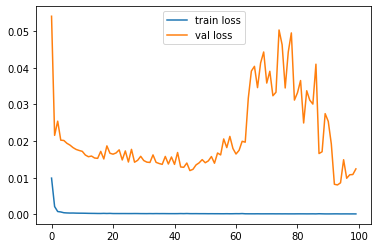

In [19]:
plt.plot(history.history['loss'], label="train loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.legend()

# Predict Test data and plot output

In [20]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

scale back the predicted values, since these are standardized 
and normalised in nature

In [21]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [22]:
print(train_predict.shape, test_predict.shape)

(716, 1) (340, 1)


In [23]:
# rmse performance metrics
import math
from sklearn.metrics import mean_squared_error
print("RMSE for train data is:", math.sqrt(mean_squared_error(y_train, train_predict)))
print("RMSE for test data is:", math.sqrt(mean_squared_error(y_test, test_predict)))

RMSE for train data is: 156.98275379630863
RMSE for test data is: 254.3921458832011


RMSE seems to be greater, whereas both the validation and train losses were
very low, its because the RMSE is calculated after up-scaling the predictions
to their original values, hence large variations will be observed anyways

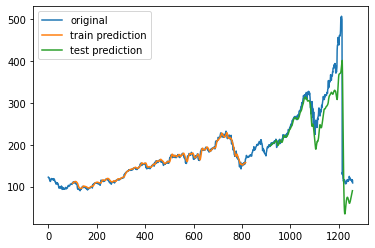

In [24]:
# shift the values for predictions on train data for convenience in plotting
trainPredictedPlot = np.empty_like(df1) # create an empty(no values initialized) 
                                        # 2-D np array with same shape as df1
trainPredictedPlot[:, :] = np.nan # fill all values as nan
trainPredictedPlot[time_step:len(train_predict)+time_step, :] = train_predict

# shift the values for predictions on test data for convenience in plotting
testPredictedPlot = np.empty_like(df1)
testPredictedPlot[:, :] = np.nan
testPredictedPlot[len(train_predict)+2*time_step+1: len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), label='original')
plt.plot(trainPredictedPlot, label="train prediction")
plt.plot(testPredictedPlot, label="test prediction")
plt.legend()
plt.show()

# Predict for future
predict the output using this model for future 30 days, plot the output

In [25]:
currInput = x_test[-1:]
print(currInput.shape)

totalDays = 30
currDayNum = 0
lstm_output = []

while currDayNum < totalDays:
  y_pred_temp = model.predict(currInput)
  lstm_output.append(y_pred_temp[0][0])
  tempInput = np.squeeze(currInput)
  tempInput = np.append(tempInput[1:], y_pred_temp[0], axis=0)
  currInput = np.expand_dims(np.expand_dims(tempInput, axis=1), axis=0)
  currDayNum += 1

(1, 100, 1)


In [26]:
lstm_output = np.array(lstm_output).reshape(-1, 1)
y_new = scaler.inverse_transform(lstm_output)

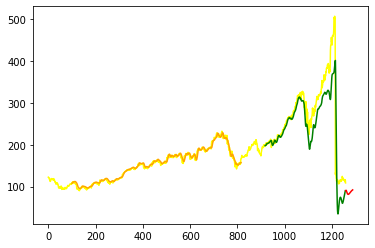

In [27]:
# shift the values for predictions for 3 days further, for 
# convenience in plotting
newShape = (len(df1)+totalDays, 1)
predictedPlot = np.empty(shape=newShape)
predictedPlot[:, :] = np.nan
predictedPlot[len(df1):, :] = y_new

plt.plot(scaler.inverse_transform(df1),color="yellow", label='original')
plt.plot(trainPredictedPlot, color="orange", label="training prediction")
plt.plot(testPredictedPlot, color="green", label="testing prediction")
plt.plot(predictedPlot, color="red", label="3 days prediction")

In [31]:
predictedOutputs = np.squeeze(y_new)
print(predictedOutputs.shape)

(30,)


In [34]:
# create the predicted dataframe
answerDf = pd.DataFrame(
    data = {
        'future dates': futureDates,
        'prediction': predictedOutputs
        }
)

display(answerDf.head(10))
print("\n\n\n")
display(answerDf.tail(10))

,future dates,prediction
0,2020-11-02,90.261528
1,2020-11-03,91.319832
2,2020-11-04,90.853371
3,2020-11-05,89.406227
4,2020-11-06,87.559273
5,2020-11-09,85.730782
6,2020-11-10,84.162476
7,2020-11-11,82.955620
8,2020-11-12,82.128120
9,2020-11-13,81.651566


,future dates,prediction
20,2020-11-30,87.166847
21,2020-12-01,87.868591
22,2020-12-02,88.537415
23,2020-12-03,89.169678
24,2020-12-04,89.763893
25,2020-12-07,90.320793
26,2020-12-08,90.841850
27,2020-12-09,91.329651
28,2020-12-10,91.787842
29,2020-12-11,92.220360


In [ ]:
print(y_pred_temp[0].shape, y_pred_temp[0][0], "\n\n")

tempInput = np.squeeze(currInput)
print(tempInput[:3])
print(tempInput.shape, currInput.shape)

tempInput = np.append(tempInput[1:], y_pred_temp[0], axis=0)
print(tempInput[:2])

xIP = np.expand_dims(np.expand_dims(tempInput, axis=1), axis=0)
print(xIP.shape)

(1,) 0.029275855 


[0.55797956 0.58006013 0.5847745 ]
(100,) (1, 100, 1)
[0.58006013 0.5847745 ]
(1, 100, 1)
